In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("./datasets/covid19-symtomps-checker.csv");
print(df.columns)
df.head()

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [6]:
df.drop(inplace=True, columns=['Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Country', 'Age_0-9'])
print(df.columns)
df.head()

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_10-19', 'Age_20-24',
       'Age_25-59', 'Age_60+', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0


In [7]:
df.dropna(inplace=True)

In [8]:
df["Severity"] = np.where(df["Severity_None"] == 1, "None", \
                    np.where(df["Severity_Mild"] == 1, "Mild", 
                    np.where(df["Severity_Moderate"] == 1, "Moderate", 
                    np.where(df["Severity_Severe"] == 1, "Severe", None))))

df.drop(columns=['Severity_Mild', 'Severity_Moderate', 'Severity_None', 'Severity_Severe'], inplace=True)

df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_10-19,Age_20-24,Age_25-59,Age_60+,Contact_Dont-Know,Contact_No,Contact_Yes,Severity
0,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,Mild
1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,Mild
2,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,Mild
3,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,Moderate
4,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,1,0,Moderate


### Building the model using SVM with linear kernel

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X = df.drop(columns =["Severity"])
y = df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training model with plain dataset

In [10]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

Training model with dataset that has been selected using LDA

In [11]:
model_lda = LinearSVC()
model_lda.fit(X_train, y_train)

LinearSVC()

### Accuracy testing

accuracy_score:  0.24141414141414141


Text(89.18, 0.5, 'predicted label')

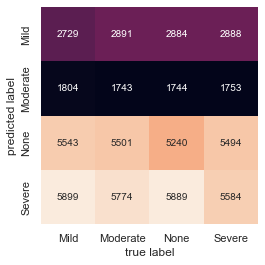

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

y_pred = model.predict(X_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred))

mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=np.unique(y_pred), yticklabels=np.unique(y_pred))
plt.xlabel('true label')
plt.ylabel('predicted label')

Uji dengan menggunakan LDA

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df = pd.read_csv("./datasets/covid19-symtomps-checker.csv");
print(df.columns)
df.head()

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


In [15]:
df.drop(inplace=True, columns=['Gender_Female', 'Gender_Male', 'Gender_Transgender', 'Country', 'Age_0-9'])
print(df.columns)
df.head()

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_10-19', 'Age_20-24',
       'Age_25-59', 'Age_60+', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes'],
      dtype='object')


,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Age_20-24,Age_25-59,Age_60+,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
1,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,0,1,0
2,1,1,1,1,1,0,1,1,1,1,...,0,0,0,1,0,0,0,1,0,0
3,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,0,0,0,1,0,0,0,1,0


In [26]:
X = df.iloc[:, :21].values
y = df.iloc[:, 21].values

Membagi data ke dalam  Training set dan Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Proses Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Menjalankan algoritma LDA

Import LDA model

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Initialize LDA

In [30]:
lda = LDA(n_components = 2)

In [31]:
X_test = lda.fit_transform(X_test, y_test)
X_train = lda.transform(X_train)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

Menjalankan algoritma logistic regression ke training set

In [32]:
from sklearn.linear_model import LogisticRegression
mesin_klasifikasi = LogisticRegression(random_state = 0)
mesin_klasifikasi.fit(X_train, y_train)

LogisticRegression(random_state=0)

Memprediksi test set berdasakan model logistic regression

In [33]:
y_pred = mesin_klasifikasi.predict(X_test)

Membuat confusion matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

Visualisasi Training Set

In [35]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 21 features as input.

Visualisasi Test Set

In [36]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

ValueError: X has 2 features, but LogisticRegression is expecting 21 features as input.